<a href="https://colab.research.google.com/github/nguefackuriel/Initiation-to-pytorch-Breast-cancer-classification/blob/main/Breast_Cancer_Pytorch_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import Dataset

import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch import optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

## load Dataset using pandas

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [99]:
np.random.seed(42)

In [100]:
data = pd.read_csv('/content/drive/MyDrive/data.csv')

In [101]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [102]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


##Drop the columns id and Unnamed: 32

In [103]:
data = data.drop(columns = ['id', 'Unnamed: 32'])

## separate your input data and target (the target correspond to the column diagnosis)

In [104]:
X = data.drop(columns = ['diagnosis'])
y = data['diagnosis']
X.shape, y.shape

((569, 30), (569,))

## Convert your data into numpy arrays

In [105]:
X = X.to_numpy()
y = y.to_numpy()

## transform you target values into 0 (for M) and 1 (for B)

In [107]:
y = np.where(y == 'M', 0, 1)

## Split your data into train and test sets (20% for test)

In [109]:
X.shape

(569, 30)

In [110]:
def split_data(x, y):

  index = int(0.8*x.shape[0])
  X_train, y_train = X[:index], y[:index]
  X_test, y_test = X[index:,], y[index:]
  
  return X_train, y_train, X_test, y_test

In [111]:
X_train, y_train, X_test, y_test = split_data(X, y)

In [112]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

## Feature scaling

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Why is it important to scale this data?

It is important to scale this data to make sure that biggest values dont have too much effect on the model than smallest values.

##Implement the BreastCancerDataset class that inherit from pytorch Dataset

In [114]:
from torch.utils.data import Dataset, DataLoader

In [115]:
class BreastCancerDataset(Dataset):
  def __init__(self, x, y, transform = None):
    self.n_samples = x.shape[0]
    self.x_data = x
    self.y_data = y
    self.transform = transform

 
  def __getitem__(self, index):
      sample =  self.x_data[index], self.y_data[index]
      if self.transform:
        sample = self.transform(sample)
      return sample

  def __len__(self):
      return self.n_samples

class ToTensor:
  def __call__(self, sample):
    inputs, target = sample

    return torch.tensor(inputs, dtype = torch.float32).to(device), torch.tensor(target, dtype = torch.float32).to(device)


In [116]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
dataset = BreastCancerDataset(X_train, y_train, transform=ToTensor())

## create dataloader with batch_size 16
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)



In [117]:
first_batch = next(iter(train_loader))
inputs, label = first_batch

## Feedforward network

In [118]:
torch.cuda.is_available()

False

In [119]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [173]:
# Fully connected neural network with an input layer, one hidden layer and an output layer
## apply relu between layers
# add Sigmoid  after the output layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        ## add your layers
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()

    
    def forward(self, x):
        out = self.sigmoid(self.l2(self.relu(self.l1(x))))
        return out

In [174]:


# Hyper-parameters 
input_size = inputs.shape[1]
hidden_size = 50
num_classes = 1
num_epochs = 100
learning_rate = 0.0001

## initialize your model
model = NeuralNet(input_size, hidden_size, num_classes)


In [175]:
model

NeuralNet(
  (l1): Linear(in_features=30, out_features=50, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=50, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

## define a criterion and optimizer

In [176]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

## Train your model (save the loss in a list and plot it)

In [177]:
losses = []
for epoch in range(num_epochs):
  
  ### add your training code here
  for i, (inputs, labels) in enumerate(train_loader):  

    # inputs = inputs.to(device)
    # labels = labels.to(device)
    
    # Forward pass
    outputs = model(inputs)

    ## compute the loss between output and labels
    loss = criterion(outputs.flatten(),labels)
    
    # Backward pass
    loss.backward()

    ## update parameters
    optimizer.step()

    ## zeros the gradient
    optimizer.zero_grad()

    if (i+1) % 2 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
  losses.append(loss.item())



Epoch [1/100], Loss: 0.6789
Epoch [1/100], Loss: 0.6933
Epoch [1/100], Loss: 0.6671
Epoch [1/100], Loss: 0.7373
Epoch [1/100], Loss: 0.6463
Epoch [1/100], Loss: 0.7010
Epoch [1/100], Loss: 0.6870
Epoch [1/100], Loss: 0.7314
Epoch [1/100], Loss: 0.7383
Epoch [1/100], Loss: 0.6876
Epoch [1/100], Loss: 0.6590
Epoch [1/100], Loss: 0.6663
Epoch [1/100], Loss: 0.6664
Epoch [1/100], Loss: 0.6825
Epoch [1/100], Loss: 0.7229
Epoch [1/100], Loss: 0.6775
Epoch [1/100], Loss: 0.7173
Epoch [1/100], Loss: 0.6517
Epoch [1/100], Loss: 0.7667
Epoch [1/100], Loss: 0.6504
Epoch [1/100], Loss: 0.7068
Epoch [1/100], Loss: 0.6457
Epoch [1/100], Loss: 0.6609
Epoch [1/100], Loss: 0.6112
Epoch [1/100], Loss: 0.7498
Epoch [1/100], Loss: 0.7141
Epoch [1/100], Loss: 0.6913
Epoch [1/100], Loss: 0.6362
Epoch [2/100], Loss: 0.6916
Epoch [2/100], Loss: 0.6971
Epoch [2/100], Loss: 0.6403
Epoch [2/100], Loss: 0.6610
Epoch [2/100], Loss: 0.6722
Epoch [2/100], Loss: 0.7332
Epoch [2/100], Loss: 0.5812
Epoch [2/100], Loss:

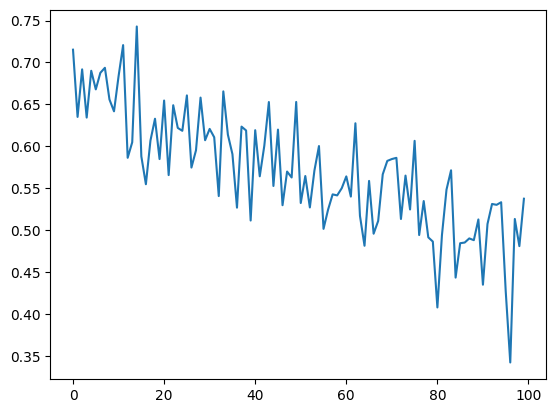

In [178]:
plt.plot(losses)

## Test the model

In [179]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
dataset_test = BreastCancerDataset(X_test, y_test, transform=ToTensor())

## create dataloader with batch_size 16
test_loader = DataLoader(dataset_test, batch_size=8, shuffle=True)

In [180]:
# Remember that in test phase, we don't need to compute gradients 
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for inputs, labels in test_loader:
        # inputs = inputs.to(device)
        # labels = labels.to(device)
        outputs = model(inputs)
        # max returns (value ,index)
        predicted = torch.where(outputs>=0.5, 1,0).reshape(1,-1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 114 test samples: {acc} %')


Accuracy of the network on the 114 test samples: 94.73684210526316 %


## Saving your model

In [ ]:
## save your model
torch.save(model.state_dict(), '/content/drive/MyDrive/model_weights1.pth')

## change your activation functions, reimplement your model class with the new activation functions and train the model with the best hyper parameters that you found so far.

Plot the loss during training



####Model 2

In [88]:
# Fully connected neural network with an input layer, one hidden layer and an output layer
## apply relu between layers
# add Sigmoid  after the output layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        ## add your layers
        self.l1 = nn.Linear(input_size, hidden_size1)
        self.l2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size2, num_classes)
        self.sigmoid = nn.Sigmoid()

    
    def forward(self, x):
        out = self.sigmoid(self.l3(self.relu(self.l2(self.relu(self.l1(x))))))
        return out

In [89]:


# Hyper-parameters 
input_size = inputs.shape[1]
hidden_size1 = 50
hidden_size2 = 70
num_classes = 1
num_epochs = 100
learning_rate = 0.001

## initialize your model
model2 = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes)


In [90]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)  

In [91]:
losses = []
for epoch in range(num_epochs):
  
  ### add your training code here
  for i, (inputs, labels) in enumerate(train_loader):  

    # inputs = inputs.to(device)
    # labels = labels.to(device)
    
    # Forward pass
    outputs = model2(inputs)

    ## compute the loss between output and labels
    loss = criterion(outputs.flatten(),labels)
    
    # Backward pass
    loss.backward()

    ## update parameters
    optimizer.step()

    ## zeros the gradient
    optimizer.zero_grad()

    if (i+1) % 2 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
  losses.append(loss.item())



Epoch [1/100], Loss: 0.6818
Epoch [1/100], Loss: 0.6992
Epoch [1/100], Loss: 0.6943
Epoch [1/100], Loss: 0.6744
Epoch [1/100], Loss: 0.6715
Epoch [1/100], Loss: 0.7042
Epoch [1/100], Loss: 0.6844
Epoch [1/100], Loss: 0.6822
Epoch [1/100], Loss: 0.6681
Epoch [1/100], Loss: 0.7076
Epoch [1/100], Loss: 0.7016
Epoch [1/100], Loss: 0.6728
Epoch [1/100], Loss: 0.7007
Epoch [1/100], Loss: 0.6994
Epoch [1/100], Loss: 0.6974
Epoch [1/100], Loss: 0.6772
Epoch [1/100], Loss: 0.6721
Epoch [1/100], Loss: 0.7042
Epoch [1/100], Loss: 0.6930
Epoch [1/100], Loss: 0.7002
Epoch [1/100], Loss: 0.6767
Epoch [1/100], Loss: 0.6976
Epoch [1/100], Loss: 0.7009
Epoch [1/100], Loss: 0.6853
Epoch [1/100], Loss: 0.6942
Epoch [1/100], Loss: 0.7091
Epoch [1/100], Loss: 0.6992
Epoch [1/100], Loss: 0.6801
Epoch [2/100], Loss: 0.6925
Epoch [2/100], Loss: 0.6896
Epoch [2/100], Loss: 0.6989
Epoch [2/100], Loss: 0.6771
Epoch [2/100], Loss: 0.6910
Epoch [2/100], Loss: 0.6791
Epoch [2/100], Loss: 0.6887
Epoch [2/100], Loss:

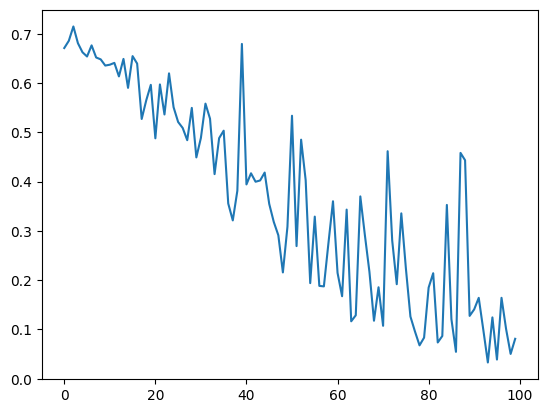

In [92]:
plt.plot(losses)

In [93]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
dataset_test = BreastCancerDataset(X_test, y_test, transform=ToTensor())

## create dataloader with batch_size 16
test_loader = DataLoader(dataset_test, batch_size=8, shuffle=True)

In [94]:
# Remember that in test phase, we don't need to compute gradients 
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for inputs, labels in test_loader:
        # inputs = inputs
        # labels = labels
        outputs = model2(inputs)
        # max returns (value ,index)
        predicted = torch.where(outputs>=0.5, 1,0).reshape(1,-1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 114 test samples: {acc} %')


Accuracy of the network on the 114 test samples: 97.36842105263158 %


### Third model

In [156]:
# Fully connected neural network with an input layer, one hidden layer and an output layer
## apply relu between layers
# add Sigmoid  after the output layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(NeuralNet, self).__init__()
        ## add your layers
        self.l1 = nn.Linear(input_size, hidden_size1)
        self.l2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size2, hidden_size3)
        self.l4 = nn.Linear(hidden_size3, num_classes)
        self.sigmoid = nn.Sigmoid()

    
    def forward(self, x):
        out = self.sigmoid(self.l4(self.relu(self.l3(self.relu(self.l2(self.relu(self.l1(x))))))))
        return out

In [157]:
# Hyper-parameters 
input_size = inputs.shape[1]
hidden_size1 = 50
hidden_size2 = 60
hidden_size3 = 70
num_classes = 1
num_epochs = 100
learning_rate = 0.001
## initialize your model
model3 = NeuralNet(input_size, hidden_size1, hidden_size2,hidden_size3,  num_classes)


In [158]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)  

In [159]:
losses = []
for epoch in range(num_epochs):
  
  ### add your training code here
  for i, (inputs, labels) in enumerate(train_loader):  

    # inputs = inputs.to(device)
    # labels = labels.to(device)
    
    # Forward pass
    outputs = model3(inputs)

    ## compute the loss between output and labels
    loss = criterion(outputs.flatten(),labels)
    
    # Backward pass
    loss.backward()

    ## update parameters
    optimizer.step()

    ## zeros the gradient
    optimizer.zero_grad()

    if (i+1) % 2 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
  losses.append(loss.item())



Epoch [1/100], Loss: 0.7327
Epoch [1/100], Loss: 0.6833
Epoch [1/100], Loss: 0.6947
Epoch [1/100], Loss: 0.6842
Epoch [1/100], Loss: 0.6756
Epoch [1/100], Loss: 0.6423
Epoch [1/100], Loss: 0.6160
Epoch [1/100], Loss: 0.6584
Epoch [1/100], Loss: 0.6029
Epoch [1/100], Loss: 0.5699
Epoch [1/100], Loss: 0.6386
Epoch [1/100], Loss: 0.4097
Epoch [1/100], Loss: 0.5269
Epoch [1/100], Loss: 0.4677
Epoch [1/100], Loss: 0.3629
Epoch [1/100], Loss: 0.5079
Epoch [1/100], Loss: 0.5134
Epoch [1/100], Loss: 0.3526
Epoch [1/100], Loss: 0.4265
Epoch [1/100], Loss: 0.3411
Epoch [1/100], Loss: 0.1572
Epoch [1/100], Loss: 0.2912
Epoch [1/100], Loss: 0.2456
Epoch [1/100], Loss: 0.3521
Epoch [1/100], Loss: 0.1602
Epoch [1/100], Loss: 0.0439
Epoch [1/100], Loss: 0.1080
Epoch [1/100], Loss: 0.0315
Epoch [2/100], Loss: 0.0994
Epoch [2/100], Loss: 0.0969
Epoch [2/100], Loss: 0.1655
Epoch [2/100], Loss: 0.0397
Epoch [2/100], Loss: 0.0925
Epoch [2/100], Loss: 0.3578
Epoch [2/100], Loss: 0.0943
Epoch [2/100], Loss:

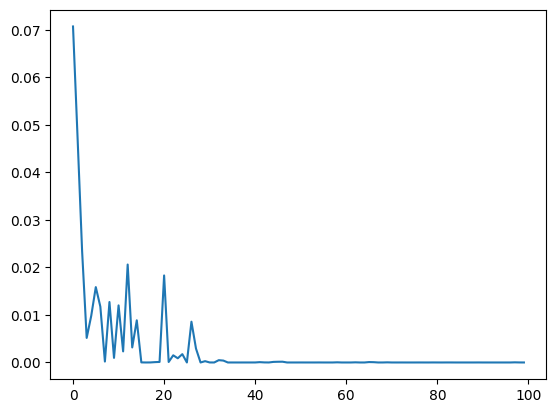

In [160]:
plt.plot(losses)

In [161]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
dataset_test = BreastCancerDataset(X_test, y_test, transform=ToTensor())

## create dataloader with batch_size 16
test_loader = DataLoader(dataset_test, batch_size=8, shuffle=True)

In [162]:
# Remember that in test phase, we don't need to compute gradients 
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for inputs, labels in test_loader:
        # inputs = inputs.to(device)
        # labels = labels.to(device)
        outputs = model3(inputs)
        # max returns (value ,index)
        predicted = torch.where(outputs>=0.5, 1,0).reshape(1,-1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 114 test samples: {acc} %')


Accuracy of the network on the 114 test samples: 99.12280701754386 %


In [170]:
## save your model
torch.save(model3.state_dict(), '/content/drive/MyDrive/model_weights3.pth')

### Fourth model




In [181]:
# Fully connected neural network with an input layer, one hidden layer and an output layer
## apply relu between layers
# add Sigmoid  after the output layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        ## add your layers
        self.l1 = nn.Linear(input_size, hidden_size1)
        self.l2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size2, num_classes)
        self.sigmoid = nn.Sigmoid()

    
    def forward(self, x):
        out = self.sigmoid((self.l3(self.relu(self.l2(self.relu(self.l1(x)))))))
        return out

In [182]:
# Hyper-parameters 
input_size = inputs.shape[1]
hidden_size1 = 80
hidden_size2 = 100
num_classes = 1
num_epochs = 100
learning_rate = 0.001
## initialize your model
model4 = NeuralNet(input_size, hidden_size1, hidden_size2,  num_classes)


In [183]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=learning_rate)  

In [184]:
losses = []
for epoch in range(num_epochs):
  
  ### add your training code here
  for i, (inputs, labels) in enumerate(train_loader):  

    # inputs = inputs.to(device)
    # labels = labels.to(device)
    
    # Forward pass
    outputs = model4(inputs)

    ## compute the loss between output and labels
    loss = criterion(outputs.flatten(),labels)
    
    # Backward pass
    loss.backward()

    ## update parameters
    optimizer.step()

    ## zeros the gradient
    optimizer.zero_grad()

    if (i+1) % 2 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
  losses.append(loss.item())



Epoch [1/100], Loss: 0.6731
Epoch [1/100], Loss: 0.6200
Epoch [1/100], Loss: 0.6020
Epoch [1/100], Loss: 0.5802
Epoch [1/100], Loss: 0.5567
Epoch [1/100], Loss: 0.4296
Epoch [1/100], Loss: 0.5067
Epoch [1/100], Loss: 0.4526
Epoch [1/100], Loss: 0.4296
Epoch [1/100], Loss: 0.3998
Epoch [1/100], Loss: 0.4162
Epoch [1/100], Loss: 0.3417
Epoch [1/100], Loss: 0.2503
Epoch [1/100], Loss: 0.2977
Epoch [1/100], Loss: 0.2632
Epoch [1/100], Loss: 0.1925
Epoch [1/100], Loss: 0.2654
Epoch [1/100], Loss: 0.1565
Epoch [1/100], Loss: 0.1348
Epoch [1/100], Loss: 0.0693
Epoch [1/100], Loss: 0.1868
Epoch [1/100], Loss: 0.0699
Epoch [1/100], Loss: 0.1574
Epoch [1/100], Loss: 0.0526
Epoch [1/100], Loss: 0.0447
Epoch [1/100], Loss: 0.1773
Epoch [1/100], Loss: 0.2875
Epoch [1/100], Loss: 0.0734
Epoch [2/100], Loss: 0.1487
Epoch [2/100], Loss: 0.0426
Epoch [2/100], Loss: 0.1547
Epoch [2/100], Loss: 0.1297
Epoch [2/100], Loss: 0.0214
Epoch [2/100], Loss: 0.0537
Epoch [2/100], Loss: 0.1922
Epoch [2/100], Loss:

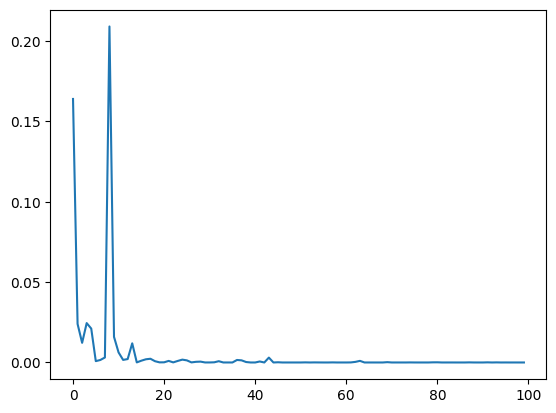

In [185]:
plt.plot(losses)

In [186]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
dataset_test = BreastCancerDataset(X_test, y_test, transform=ToTensor())

## create dataloader with batch_size 16
test_loader = DataLoader(dataset_test, batch_size=8, shuffle=True)

In [187]:
# Remember that in test phase, we don't need to compute gradients 
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for inputs, labels in test_loader:
      # inputs = inputs.to(device)
      # labels = labels.to(device)
        outputs = model4(inputs)
        # max returns (value ,index)
        predicted = torch.where(outputs>=0.5, 1,0).reshape(1,-1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 114 test samples: {acc} %')
#compute also the accuracy on your test set

Accuracy of the network on the 114 test samples: 93.85964912280701 %


### Comments

For this work, we used a batch size = 8. Here is the summary of our different models 

|Model | Number of Hidden layers | Size of Hidden layers   | Learning rate | Optimizer | Number of epochs | Accuracy(%)
|------|------|------|------|------|------|------|
|Model 1 |   1  | 50| 0.001| SGD | 100 | 94.74
|Model 2 |   2  | 50, 60| 0.001| SGD | 100 | 97.37
|Model 3 |   3  | 50, 60, 70| 0.001| Adam | 100 | 99.12
|Model 4 |   2  | 80, 100| 0.001| Adam | 100 | 93.86

1. We started with a simple model($model 1$) with just one hidden layers with 50 neurons and the optimizer SGD and we have obtained an accuracy of 94.74%. 

2. We then decide to deepen our netwok($model 2$) by increasing the number of hidden layers. Now having, 2 layers with 50 neurons on the first layer and 60 neurons on the second layer, our accuracy increased to 97.37%.

3. We decided to deepen the network again($model 3$) by increasing the number of hidden layers, now having 3 hidden layers with 50, 60, 70 neurons respectively, we obtained an accuracy of 99.12%, this time with Adam optimizer.


4. Coming back on a model with two layers($model 4$), we have increased the numbers of neurons, with a network with 2 hidden layers, 80 and 100 neurons respectively, the accuracy decreased to 93.86% using Adam optimizer.



$Conclusion:$ So what we can conclude is that for this problem, having a deep network ($model 4$) improve our model performance. 